# Chapter 6

Suppose we have independent random variables $X_1, \ldots, X_n$ all distributed with respect to one and the same probability distribution $F$.

That is, we have independent $X_1, \ldots, X_n\sim F$.

We view $X_1, \ldots, X_n$ as the data and $F$ as the cdf of the probability distribution.

Our task is to use the data to learn about the probability distribution.

Being humble creatures, we just start looking at different operations to apply to the data.


## Statistics


### Definition (statistics)

A *statistic* $T_n$ is just any operation applied to the data $X_1, \ldots, X_n$. Here are the some examples many of which you have probably seen before:

- Average $\overline{X}_n$: at world $\omega$ it is $\overline{X}_n(\omega) = \frac{1}{n}\sum_{i=1}^n X_i(\omega)$ (n.b.: average also called mean)

- Median of $X_1,\ldots, X_n$: at world $\omega$, sort the numbers $X_1(\omega), \ldots, X_n(\omega)$ in increasing order and find the one in the middle (and in the case where $n$ is odd, take the average of the two middle ones)

- Midspread of $X_1, \ldots, X_n$: at world $\omega$, sort the numbers $X_1(\omega), \ldots, X_n(\omega)$ in increasing order, and split it into four even parts and report the difference between the part at 75% and the part at 25%

Here is one that is not very interesting but is indeed 'an operation applied to the data':

- Square of average: $\overline{X}_n^2$: at world $\omega$ it is $\overline{X}^2_n(\omega) = (\frac{1}{n}\sum_{i=1}^n X_i(\omega))^2$


### Two perspectives which both statisticians and philosophers at home with

We recognize two different perspectives which are useful: 

- We can focus on the actual world, that is at a particular world $\omega$ which we happen to inhabit, and we can look at the behavior of the statistic at that world. 

- We can focus on what happens across the worlds, and we can view the statistics as random variables and ask questions about e.g. their expectation and their variance.  

Further, part and parcel of the tradition in parts of boths disciplines is:

- go ceaselessly back and forth between the two perspectives, to the great annoyance of everyone else

### Perspective one: the actual world

Fix $\omega$ as the actual world. Then all of our statistics deliver real numbers as values when we evaluate them at $\omega$. In terms of our actual human activity, these are just the measurements we make.

In [1]:
# packages we need

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import numpy as np
import pandas as pd
from statistics import mean , stdev , median, mode
from random import choices
from scipy.stats import norm

In [2]:
# simple python code for statistics


def descriptive(data):

    average = sum(data) / len(data)

    median = np.median(data)

    midspread = np.percentile(data, 75)-np.percentile(data, 25)

    average_squared =  average**2

    print('Sorted: ', sorted(data))

    print('Average: %1.1f' % average)

    print('Median: %1.1f' % median)

    print('Midspread: %1.1f' % midspread)

    print('Average Squared: %1.1f' % average_squared)


In [3]:
# Suppose that X_1(ω),\ldots, X_n(ω) is

data = [17, 18, 9, 10, 9, 7, 8, 14, 0, 16, 17]     

descriptive(data)    # command for descriptive statistics

Sorted:  [0, 7, 8, 9, 9, 10, 14, 16, 17, 17, 18]
Average: 11.4
Median: 10.0
Midspread: 8.0
Average Squared: 129.1


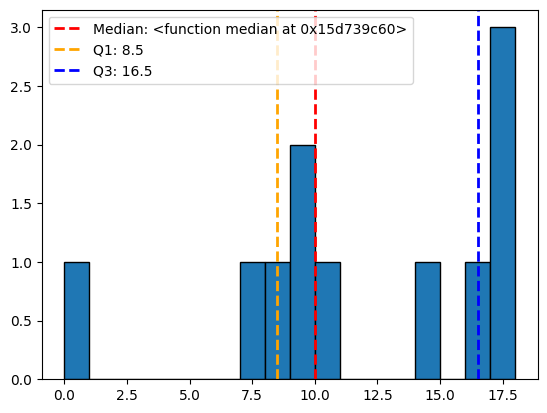

In [4]:
# Create a histogram


plt.hist(data, bins=max(data)-min(data), edgecolor='black')

# Show the median
plt.axvline(np.median(data), color='r', linestyle='dashed', linewidth=2, label=f'Median: {median}')

# Show the midspread
plt.axvline(np.percentile(data, 25), color='orange', linestyle='dashed', linewidth=2, label=f'Q1: {np.percentile(data, 25)}')
plt.axvline(np.percentile(data, 75), color='b', linestyle='dashed', linewidth=2, label=f'Q3: {np.percentile(data, 75)}')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Perspective two: across the worlds

Last time, we learned some helpful formulas for the average. 

Suppose independent $X_1, \ldots, X_n\sim F$ with expectation $\theta$ and variance $\sigma^2$, 

Again, we abbreviate $\overline{X}_n = \frac{1}{n}\sum_{i=1}^n X_i$ for the average. 

Then $\mathbb{E} \overline{X}_n = \theta$ and $\mathrm{Var}(\overline{X}_n) = \frac{\sigma^2}{n}$.

This tells us a lot about the behavior of the average across the worlds.

### Illustrating the behavior of the variance of the average

Assume we are working with $X_1, \ldots, X_n$ which have a [normal](https://logic-teaching.github.io/philstatsbook/Chap04.html#normal-distribution) distribution (i.e. a bell-shaped one)

In [5]:
# parameters of the normal distribution

mu = 23  # mean
var = 3**2 #variance

# number of independent observations

n = 50

# variance of the average

varavg = var / n  # variance of the average


In [6]:
sigma = np.sqrt(var)
sigmaavg = np.sqrt(varavg)


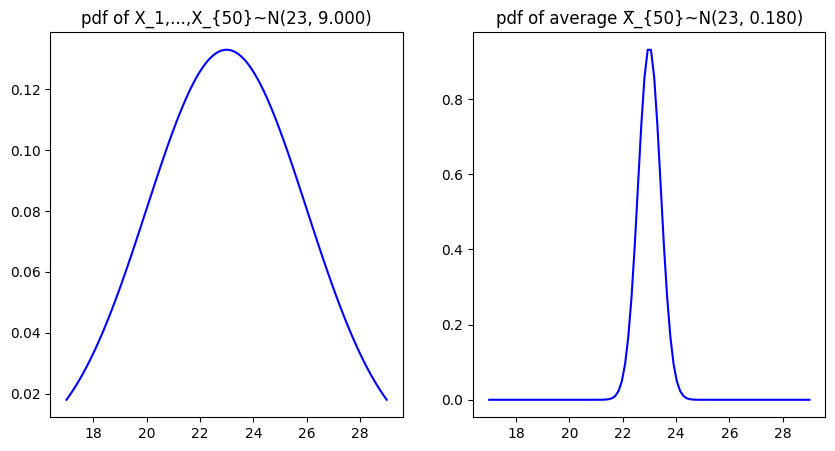

In [7]:
def create_norm_plot():

    # Create a range
    x = np.linspace(mu-2*sigma, mu+2*sigma, 100)

    # Create the normal distribution for the range
    y = norm.pdf(x, mu, sigma)
    yavg = norm.pdf(x, mu, sigmaavg)

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the normal distribution on the left subplot
    axs[0].plot(x, y, 'b')

    axs[1].plot(x, yavg, 'b')

    # Plot the histogram on the right subplot
    # axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Set titles
    axs[0].set_title('pdf of X_1,...,X_{%i}~N(%s, %1.3f)' % (n, mu, var))
    axs[1].set_title('pdf of average X̅_{%i}~N(%s, %1.3f)' % (n, mu, varavg))



    plt.show()

create_norm_plot()

### Important obstacle

There are **not** simple formulas for the expectation or variance of **any of the other statistics**, in terms of the expectation and variances of the individual random variables.

In the part of statistics that deals with *estimation*, a way has been developed to estimate the variance (but not the expectation) of these other statistics.



## The Bootstrap

This is due to Effron in the late 1970s ({cite}`Efron1979-ux`, {cite}`Efron1982-ck`). 

Despite its being so natural did not appear until late, since it requires so much computational power.

### A combinatorial theory of possibility

Philosophers are familiar with this conception of possibility:

> The fundamental idea that underlies the various versions of combinatorialism is that possible worlds are nothing more than rearrangements or recombinations of the properties, relations and particulars that are instantiated or exist in the actual world ({cite}`Melia2014-vh` p. 146)

This is a conception of possibility on which e.g. it's possible that I could have your job and you mine. 

### Building other worlds from the observations in the actual world 

Suppose that $\omega$ is the actual world, and that the observations $X_1(\omega), \ldots, X_n(\omega)$ are:

```
actual-observations = [17, 18, 9, 10, 9, 7, 8, 14, 0, 16]
```

Shouldn't there also be a world where the observations could have gone like this, with the first and second reversed:

```
alternative-observations = [18, 17, 9, 10, 9, 7, 8, 14, 0, 16]
```

And shouldn't there also be a world where the observations could have one like this, with the first being repeated:

```
alternative-observations = [17, 17, 9, 10, 9, 7, 8, 14, 0, 16]
```

The idea of the bootstrap is to generate lots of worlds from the actual world in this way.


Intuitively, the procedure is as follows:

1. Let $\omega$ be the actual world, and look at the length $n$-data set $X_1(\omega), \ldots, X_n(\omega)$.

2. Many other worlds will look just like the actual world, but with the order of observations rearranged, or with one observation made more than once. 

3. Simulate the observations made at other worlds in this way and calculate the statistic at them.

3. When you plot these, the variance (the way in which it is lax or tight around its mean), is a good proxy for the variance of the statistic, if the actual world is like most worlds and if $n$ is sufficiently big.

### The Bootstrap algorithm

In [8]:
# python code for the bootstrap

def bootstrap(data, statistic, reps, label):    # data, statistic, number of replications, label for the column
	theta_hat_stars = []  # list to store the results
	for i in range(reps):   # loop over the number of replications
		resample = choices(data, k=len(data)) # resample the data
		theta_hat_star = statistic(resample) # compute the statistic
		theta_hat_stars.append(theta_hat_star)      # store the result
	return pd.DataFrame(theta_hat_stars, columns=[label])   # return the results as a DataFrame

### Illustrating the bootstrap

This illustration is based on the discussion in the best introductory statistics book based off of the bootstrap method, namely {cite}`Chihara2018-xh` Example 5.1 (he doesn't provide the code but it is easy to construct) 

In [9]:
## Example with B bootstrap samples from a normal distribution

B = 100000

# my_measurement, a set X_1(ω),\ldots, X_n(ω), from independent  X_1,\ldots, X_n~N(mu, var)
my_data = pd.DataFrame(np.random.normal(mu, np.sqrt(var), n), columns=['A'])

# bootstrap the mean of my_measurement
my_data_bootstraped= bootstrap(my_data.A, mean, B, 'A')


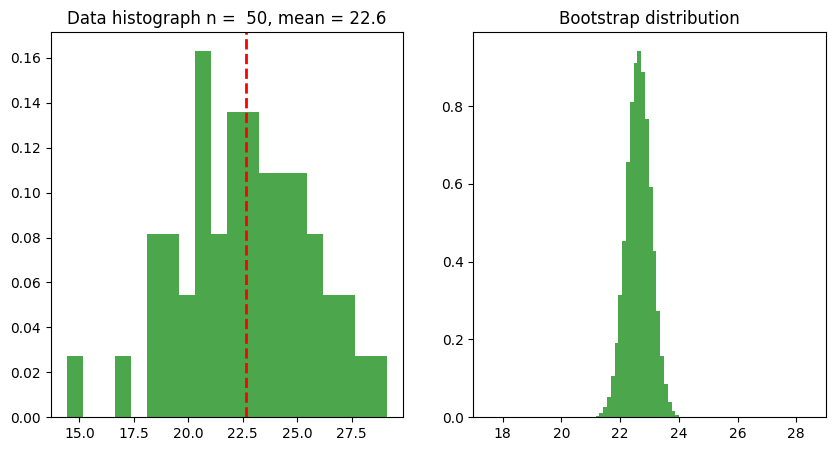

In [10]:
# Visualizing the bootstrap

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram of myheights on the left subplot
axs[0].hist(my_data, bins=20, color='g', density=True, alpha=0.7)

# Plot the histogram of myheights_bootstrap on the right subplot
axs[1].hist(my_data_bootstraped, bins=30, density=True, color='g', alpha=0.7)

plt.xlim([mu-2*sigma, mu+2*sigma])



# Show the median
axs[0].axvline(np.mean(my_data), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(my_data)}')

# Set titles
axs[0].set_title('Data histograph n = % i, mean = %1.1f' % (n, np.mean(my_data)))
axs[1].set_title('Bootstrap distribution')

plt.show()

Compare this to the theoretical one:

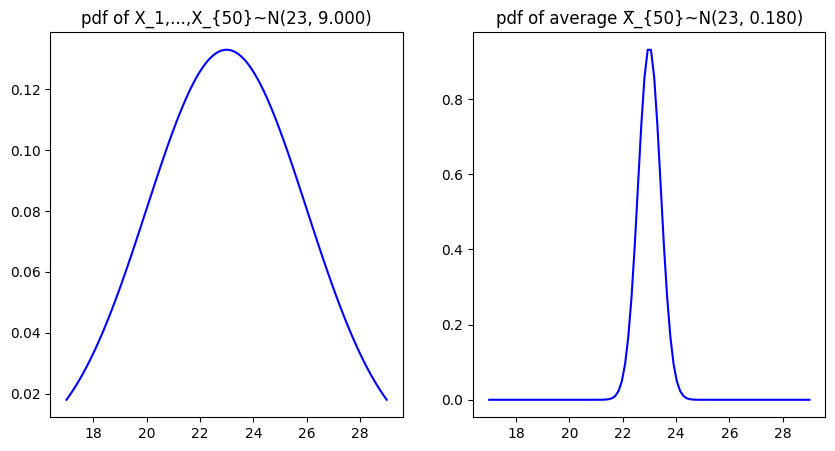

In [11]:
create_norm_plot()

### Illustrating the bootstrap for the median

In [12]:
my_data =  [19, 17, 5, 20, 14, 7, 3, 12, 6, 1, 8, 15, 16, 13, 10]


Original: [19, 17, 5, 20, 14, 7, 3, 12, 6, 1, 8, 15, 16, 13, 10] Median: 12.0
Resample: [15, 7, 17, 19, 1, 8, 16, 1, 8, 7, 14, 14, 12, 13, 14] Median: 13.0
Resample: [14, 10, 19, 14, 15, 16, 5, 19, 1, 15, 7, 7, 13, 8, 20] Median: 14.0
Resample: [20, 10, 17, 16, 20, 5, 12, 14, 3, 14, 1, 5, 17, 8, 10] Median: 12.0
Resample: [6, 3, 20, 13, 8, 3, 3, 15, 10, 8, 13, 8, 3, 10, 17] Median: 8.0
Resample: [1, 14, 12, 19, 19, 19, 15, 14, 12, 6, 13, 15, 19, 3, 5] Median: 14.0
Resample: [5, 1, 15, 12, 8, 8, 16, 13, 12, 13, 20, 17, 20, 6, 3] Median: 12.0
Resample: [15, 13, 5, 8, 20, 12, 5, 20, 12, 6, 3, 3, 6, 6, 15] Median: 8.0
Resample: [15, 7, 16, 16, 8, 3, 12, 1, 3, 16, 13, 5, 17, 14, 16] Median: 13.0
Resample: [19, 15, 19, 19, 16, 3, 7, 15, 14, 10, 7, 20, 12, 14, 7] Median: 14.0
Resample: [14, 19, 5, 8, 13, 7, 15, 10, 13, 17, 5, 5, 12, 1, 8] Median: 10.0
Resample: [10, 6, 8, 15, 7, 20, 10, 6, 3, 12, 20, 20, 6, 10, 15] Median: 10.0
Resample: [15, 1, 1, 7, 20, 3, 10, 13, 10, 8, 7, 8, 17, 13, 5] Me

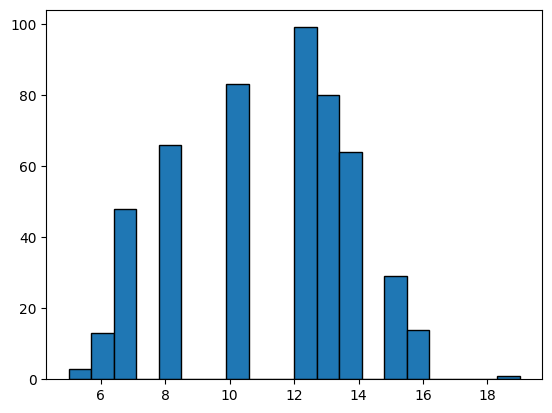

In [13]:
print('Original:', my_data, 'Median: %1.1f' % np.median(my_data))

theta_hat_stars = []  # list to store the results
for i in range(500):   # loop over the number of replications
    resample = choices(my_data, k=len(my_data)) # resample the data
    print('Resample:', resample, 'Median: %1.1f' % np.median(resample))
    theta_hat_star = median(resample) # compute the statistic
    theta_hat_stars.append(theta_hat_star)      # store the result

# Create a histogram
plt.hist(theta_hat_stars, bins=20, edgecolor='black')

# Show the plot
plt.show()

### More formal version of Bootstrap procedure

More formally, the procedure is as follows:

1. Let $\omega$ be the actual world, and look at the histogram of data $X_1(\omega), \ldots, X_n(\omega)$.

2. Choose length a length $n$ sequence $X_1^{\ast}(\omega), \ldots, X_n^{\ast}(\omega)$ from the original data $X_1(\omega), \ldots, X_n(\omega)$.

3. Compute $T_n^{\ast}:=T_n(X_1^{\ast}(\omega), \ldots, X_n^{\ast}(\omega))$.

4. Repeat steps 2-3 lots and lots of times, say $B$-many times, until you get $T_{n,1}^{\ast}, \ldots, T_{n,B}^{\ast}$.

5. Compute the value $\frac{1}{B} \sum_{i=1}^B (T_{n,i}^{\ast} - \frac{1}{B}\sum_{i=1}^B T_{n,i}^{\ast})^2$

6. Argue that if $\omega$ is like most worlds and $n$ is sufficiently big, then this value is close to the variance of the statistic.

### Features of the bootstrap

1. As you make the number of replications $B$ bigger and bigger, you never fix the mean. Hence, the bootstrap all by itself is not good at that ({cite}`Chihara2018-xh` Section 5.2.2)

2. But as you increase the number of replications, you get a better approximation to the variance of the statistic (provided that $n$ is big enough too) 